In [3]:
import numpy as np

In [5]:
from tensorflow import keras

In [6]:
# import dataset
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
# make training and testing data
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In this dataset, each image is listed as a 28x28 array. The pixel intensities are represesnted as integers from 0 to 255 and are not floats.

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

Create a validation set from the full training set. It will be the last thousand images listed in the full training set.

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
X_train.shape

(55000, 28, 28)

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
y_train.shape

(55000,)

In [14]:
X_train.max()

1.0

In [15]:
# create class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [16]:
# check the first class of y_train
class_names[y_train[0]]

'Coat'

In [ ]:
# standardize
X_test = X_test / 255.0

In [18]:
import matplotlib.pyplot as plt

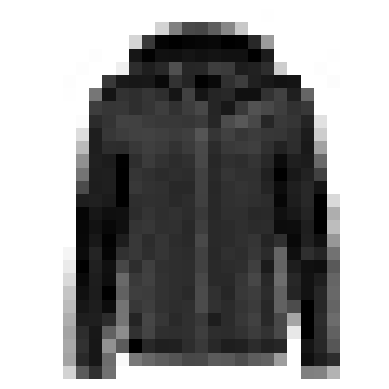

Coat


In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
print(class_names[y_train[0]])

### Building the Model

In [20]:
model = keras.models.Sequential()

This is the first layer that we build. It is a flatten layer and the role is to convert each input image to a 1D array which means it will compute X.reshape(-1, 1). Remember that .reshape(-1, 1) reshapes the data where the -1 uses all rows no matter what the number is and reshapes it in to 1 column. This layer is only meant for preprocessing so that we can use the data. That being said, there are no parameters in this layer. We include the input shape to be the shape of the instances and not the shape of the batch size. 

In [21]:
# create layers to the model
model.add(keras.layers.Flatten(input_shape = [28, 28]))

Next comes a dense hidden layer with 300 neurons. This hidden layer will use the ReLu activation function. Each Dense layer has its own weight matrix so for this layer there will be 300 seperate weights for each neuron and the inputs (this means 28x28x300 weights). It also has a bias term which is 1 per neuron. When it receives data it will compute sum(xi*wi) + b. This means there are a total of 784x300 = 235,200 number of weights. Then we add the 300 bias terms for a total of 235,500 parameters!

In [22]:
# first hidden layer
model.add(keras.layers.Dense(300, activation='relu'))

This second layer is very similar to the previous but we will have the previous layer number of inputs going to this layer multiplied by the number of neurons in this layer so we have 300x100 weights and add 100 more bias terms.

In [23]:
# second hidden layer with less neurons and same activation function
model.add(keras.layers.Dense(100, activation='relu'))

Now it is time for the Dense output layer. We have 10 neurons in this layer which is one for each class. Since the classes are exclusive, we use the softmax activation function. The softmax activation function outputs can be interpreted as the probability of that instance belonging to each of the 10 different classes and the sum of them all will equal 1. 

For this last layer we have the previous number of neurons which is 100. Then multiply by the number of neurons in this layer which is 10 for 1000 parameters then add the 10 bias terms for a total of 1010 parameters.

In [24]:
# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

We could have optionally passed a list of layers like this:

In [25]:
#model = keras.models.Sequential([
    #keras.layers.Flatten(input_shape = [28, 28]),
    #keras.layers.Dense(300, activation = 'relu'),
    #keras.layers.Dense(100, activation = 'relu),
    #keras.layers.Dense(10, activation = 'softmax')
#])

When we see **None** in the output shape it just means the batch size can be of any length. There are a ton of parameters here so the model has a lot of room to learn but also runs the risk of overfitting the data.

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


##### View the Layers


In [27]:
model.layers

In [28]:
# grab second layer
first_hidden = model.layers[1]

In [29]:
first_hidden.name

'dense'

All the parameters of a layer can be accessed using the get_weights() and set_weights() methods. For a Dense layer it includes the connection weights and bias terms.

In [30]:
weights, biases = first_hidden.get_weights()

In [31]:
weights

array([[-0.04251485, -0.02681648, -0.01488192, ..., -0.07053486,
        -0.0446747 ,  0.03106759],
       [ 0.06626818, -0.03208698,  0.07027204, ..., -0.06675838,
        -0.02990788, -0.02288781],
       [-0.03749827,  0.059755  , -0.05381654, ..., -0.00021161,
        -0.01023591,  0.03457817],
       ...,
       [-0.00443351,  0.04275605,  0.07011575, ...,  0.04139341,
         0.04390472,  0.06111863],
       [-0.04024267, -0.04390656, -0.04920275, ..., -0.01543078,
        -0.05124471, -0.03925701],
       [-0.02392028, -0.0060805 , -0.06827217, ...,  0.04267896,
         0.01752718,  0.03263275]], dtype=float32)

The shape of this layer tells us that there were 784 inputs and they each have 300 weights associated with them. This is because each neuron has a separate weight associated with each of the inputs going to it. 

In [32]:
# there should be 784x300 weights
weights.shape

(784, 300)

The weights are normally set to 0 but we can change this using **kernel_initializer** or **bias_initializer** when creating the layer. Kernel is another word for the matrix of connection weights. 

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### Compiling the Model

After the model is created, call **compile()** to specify the loss function and optimizer to use. We can also specify a list of other metrics to compute during training and evaluation. Below we use the sparse categorical cross entropy as the loss function, stochastic gradient descent as the optimizer, and accuracy for evaluation.

We used the sparse categorical cross entropy loss since we have sparse labels meaning for each instance there is just a target class index from 0 to 9 and we did not use One Hot Encoding and the classes are exclusive. If we did have just one target probability per class for each instance using One Hot Encoded vectors ([0, 0, 0, 1, 0, 0, 0, 0, 0, 0] to represent class 3), we would use categorical_crossentropy instead. If we were doing binary classification we would use the sigmoid activation function in the ouput layer and use the binary_crossentropy loss function instead. 

If we want to convert sparse labels to one hot labels we can use either keras.utils.to_categorical() function or use np.argmax() with axis = 1. 

An important note here is that using optimizer='sgd' the learning rate defaults to lr = 0.01 but we normally want to tunr the learning rate so we can instead use optimizer = keras.optimizers.SGD(lr = ???). 

In [34]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])


#### Training and Evaluation

Since the training and validation accuaracy is close for each epoch, we are probably not overfitting.

In [35]:
# fit the model 
history = model.fit(X_train, y_train, epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7277 - accuracy: 0.7595 - val_loss: 0.5530 - val_accuracy: 0.8044
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4877 - accuracy: 0.8301 - val_loss: 0.4394 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4413 - accuracy: 0.8455 - val_loss: 0.4266 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4138 - accuracy: 0.8547 - val_loss: 0.3892 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3947 - accuracy: 0.8615 - val_loss: 0.3834 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8657 - val_loss: 0.3736 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3661 - accuracy: 0.8700 - val_loss: 0.3799 - val_accuracy:

In [36]:
# accuracy is 87%
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8841


[0.3255764842033386, 0.8841000199317932]

If the training set had some skewed classes in the data we could set the class_weight argument when calling the fit method. This would give a larger weight to the underrepresented classes and lower the weight for the overrepresented classes. We could also implement a per instance weight for times when we have more faith in certain data than others. This is done with the sample_weight argument. If both are provided they get multiplied. The history of the fitted model gives us a dictionary containing the loss and other metrics measured at the end of each epoch that we can use to make a dataframe and plot it.

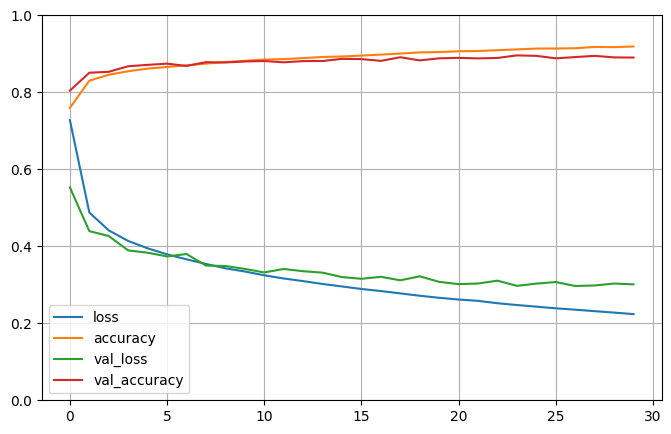

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

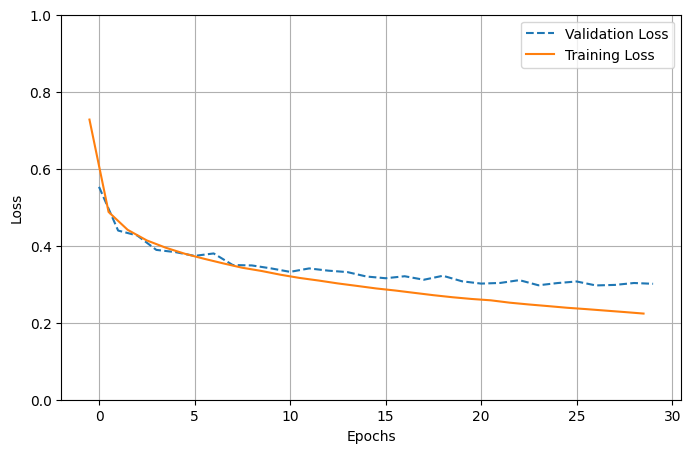

In [38]:
# using half shifted graph for better visualization
# Convert history object to DataFrame
history_df = pd.DataFrame(history.history)

# Create shifted epoch indices for training loss
epochs = range(len(history_df))
shifted_epochs = [epoch - 0.5 for epoch in epochs]  # Shift training epochs left by 0.5

# Plot validation and training loss with shifted training epochs
plt.figure(figsize=(8, 5))
plt.plot(epochs, history_df["val_loss"], label="Validation Loss", linestyle="--")
plt.plot(shifted_epochs, history_df["loss"], label="Training Loss", linestyle="-")

# Customize plot
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Making Predictions

Since we do not have any more new data we will just use the first three instances in the testing data. We just have to use the predict() method.

For the first prediction, the model has predicted it will belong to the last class with a probability of 0.95. This is ankle boot for our data. The second instance has been classified as class 2 which is the pullover and the third is classified as a trouser.

In [39]:
# new instances
new = X_test[:3]

# probabilities
y_proba = model.predict(new)

# round them
y_proba.round(2)

1/1 [==============================] - 0s 94ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.96, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

To see only the highest prediction as the predicted class use the np.argmax(model.predict(new), axis = -1). The -1 ensures that we return the highest value in the last axis which in our case is the probability since we have (samples, class probability)

In [40]:
y_pred = np.argmax(model.predict(new), axis = -1)
y_pred

1/1 [==============================] - 0s 19ms/step


array([9, 2, 1], dtype=int64)

We can get the names by converting our class names to an array and then indexing using the y_pred class integer to return the index in the class names which is the class name it belongs to.

In [41]:
# get the names 
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

#### Using the Micrograd Example

In [42]:
# inputs
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
# y ground truth ygt
ys = [1.0, -1.0, -1.0, 1.0]

In [43]:
# change to arrays
X = np.array(xs)
y = np.array(ys)

In [44]:
# build the model
model_micrograd = keras.models.Sequential()
model_micrograd.add(keras.layers.Dense(4, activation= 'tanh', input_shape = (3,)))
model_micrograd.add(keras.layers.Dense(4, activation='tanh'))
model_micrograd.add(keras.layers.Dense(1, activation='tanh'))

In [45]:
model_micrograd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# make sure we have our learning rate 0.1
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model_micrograd.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse'] )

In [49]:
model_micrograd.fit(X, y, epochs = 30)

Epoch 1/30
1/1 [==============================] - 0s 202ms/step - loss: 0.2122 - mse: 0.2122
Epoch 2/30
1/1 [==============================] - 0s 0s/step - loss: 0.1528 - mse: 0.1528
Epoch 3/30
1/1 [==============================] - 0s 0s/step - loss: 0.1171 - mse: 0.1171
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 0.0937 - mse: 0.0937
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.0775 - mse: 0.0775
Epoch 6/30
1/1 [==============================] - 0s 0s/step - loss: 0.0656 - mse: 0.0656
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 0.0566 - mse: 0.0566
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 0.0495 - mse: 0.0495
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0439 - mse: 0.0439
Epoch 10/30
1/1 [==============================] - 0s 0s/step - loss: 0.0394 - mse: 0.0394
Epoch 11/30
1/1 [==============================] - 0s 0s/step - loss: 0.0356 - mse: 0.0356

#### Example of Setting the Weights

In [50]:
# check weights 
model_micrograd.get_weights()


[array([[ 0.45168653, -0.170058  , -0.34709695,  0.716781  ],
        [ 0.67827487,  0.14675252, -0.47827372,  0.1866846 ],
        [-0.5059482 , -1.0125798 , -0.7064015 ,  0.26579675]],
       dtype=float32),
 array([-0.10840638,  0.00650759, -0.00263515, -0.01638719], dtype=float32),
 array([[ 0.44348285,  0.22409934, -0.6626385 ,  0.4640012 ],
        [ 0.27830744,  1.1074039 , -0.7244255 ,  0.8120946 ],
        [-0.884343  , -0.42099708, -0.2115314 , -0.38669968],
        [-0.5729822 , -0.54994357,  0.71323824,  0.17949992]],
       dtype=float32),
 array([ 0.03463466, -0.01719795, -0.02909997, -0.1642676 ], dtype=float32),
 array([[-0.18461508],
        [ 1.0612994 ],
        [-0.539933  ],
        [ 0.73626107]], dtype=float32),
 array([-0.08991931], dtype=float32)]

We will have a a length of 6 because we have a weight matrix and a bias vector for each layer. The first layer will have 3x4=12 weights and 4 bias terms.

In [ ]:
# input to first hidden layer weights
model_micrograd.get_weights()[0]

array([[ 0.45168653, -0.170058  , -0.34709695,  0.716781  ],
       [ 0.67827487,  0.14675252, -0.47827372,  0.1866846 ],
       [-0.5059482 , -1.0125798 , -0.7064015 ,  0.26579675]],
      dtype=float32)

In [ ]:
# bias terms from inputs to first hidden layer 4 neurons, each neuron has 1 bias term
model_micrograd.get_weights()[1]

array([-0.10840638,  0.00650759, -0.00263515, -0.01638719], dtype=float32)

In [ ]:
# length of weights
len(model_micrograd.get_weights())

6

If we want our neural network to more closely mimic the micrograd implementation we would have to set these weights manually using np.random.uniform(-1, 1).

In [54]:
# this contains all the weights
weights_micrograd = model_micrograd.get_weights()

In [55]:
# manually set them 
weights_micrograd[0] = np.random.uniform(-1, 1, weights_micrograd[0].shape)
weights_micrograd[1] = np.random.uniform(-1, 1, weights_micrograd[1].shape)
weights_micrograd[2] = np.random.uniform(-1, 1, weights_micrograd[2].shape)
weights_micrograd[3] = np.random.uniform(-1, 1, weights_micrograd[3].shape)
weights_micrograd[4] = np.random.uniform(-1, 1, weights_micrograd[4].shape)
weights_micrograd[5] = np.random.uniform(-1, 1, weights_micrograd[5].shape)

In [56]:
# set those weights back to the model
model_micrograd.set_weights(weights_micrograd)

In [57]:
# Reset optimizer state (optional, but ensures clean start)
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model_micrograd.compile(optimizer=optimizer, loss="mse")

# Fit model (now training fresh from epoch 1 with new weights)
model_micrograd.fit(X, y, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 218ms/step - loss: 1.7672
Epoch 2/30
1/1 [==============================] - 0s 0s/step - loss: 1.6402
Epoch 3/30
1/1 [==============================] - 0s 0s/step - loss: 1.3522
Epoch 4/30
1/1 [==============================] - 0s 0s/step - loss: 0.7589
Epoch 5/30
1/1 [==============================] - 0s 0s/step - loss: 0.3182
Epoch 6/30
1/1 [==============================] - 0s 3ms/step - loss: 0.2162
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 0.1654
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 0.1334
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 10/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0947
Epoch 11/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0821
Epoch 12/30
1/1 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 13/30
1/1 [==============================] - 0s 0s/step - loss: 0.064